<a href="https://colab.research.google.com/github/Emillka/Data-Science-ML/blob/main/Car_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('Car Sales.xlsx - car_data.csv')
print(df.head())
print(df.info())

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

In [74]:
# Check missing values
print(df.isnull().sum())

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


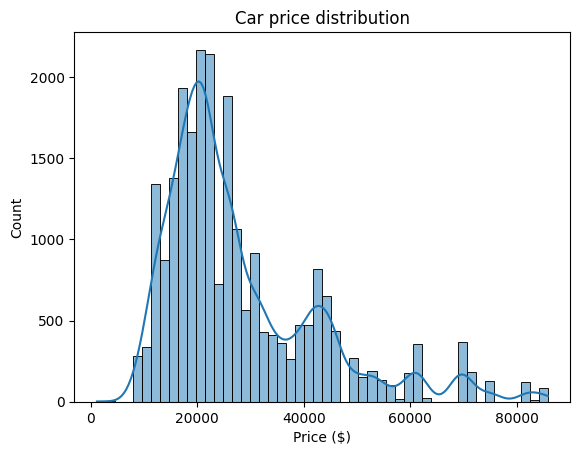

In [75]:
#Price distribution visualization
sns.histplot(df['Price ($)'], bins=50, kde=True)
plt.title("Car price distribution")
plt.show()

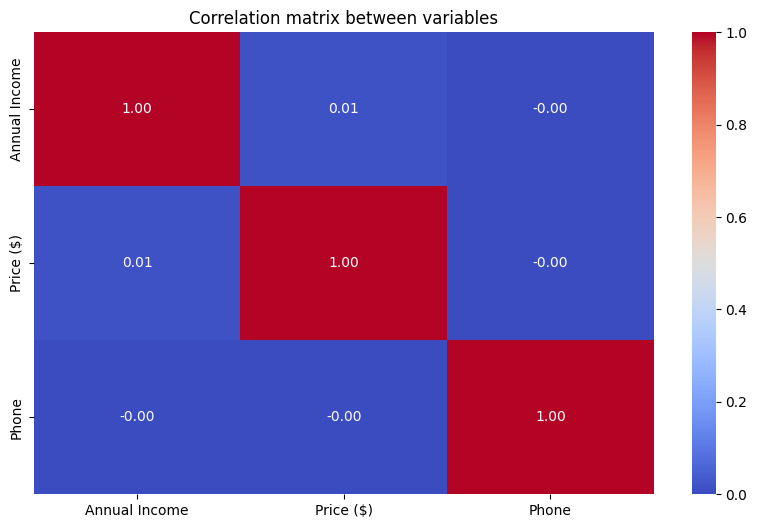

In [76]:
#Correlations between variables
plt.figure(figsize=(10,6))
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix between variables")
plt.show()

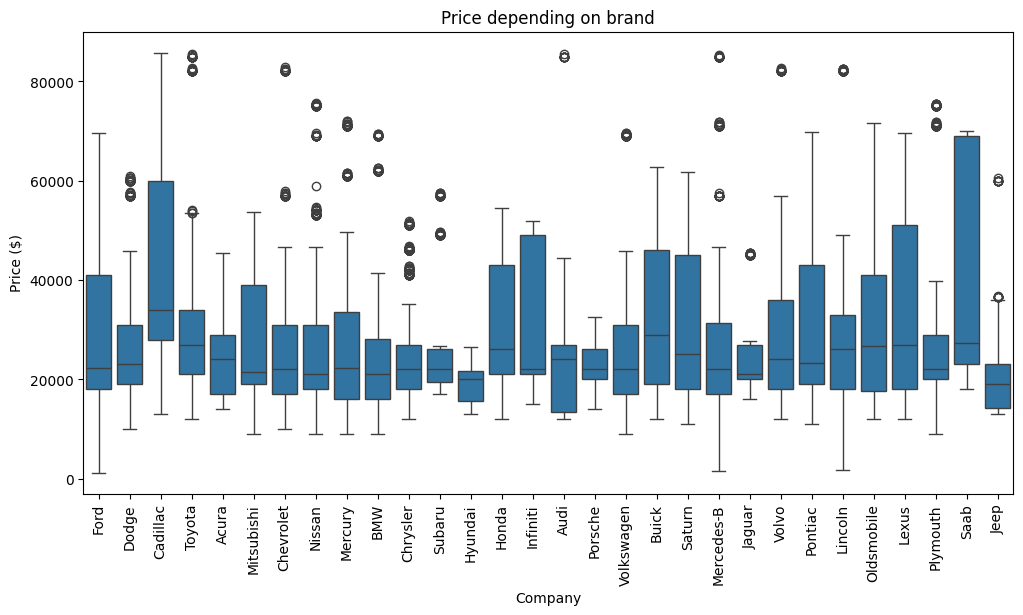

In [77]:
#Price depending on brand
plt.figure(figsize=(12,6))
sns.boxplot(x='Company', y='Price ($)', data=df)
plt.xticks(rotation=90)
plt.title("Price depending on brand")
plt.show()


In [78]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
current_year = datetime.datetime.now().year
df['car_age'] = current_year - df['Year']

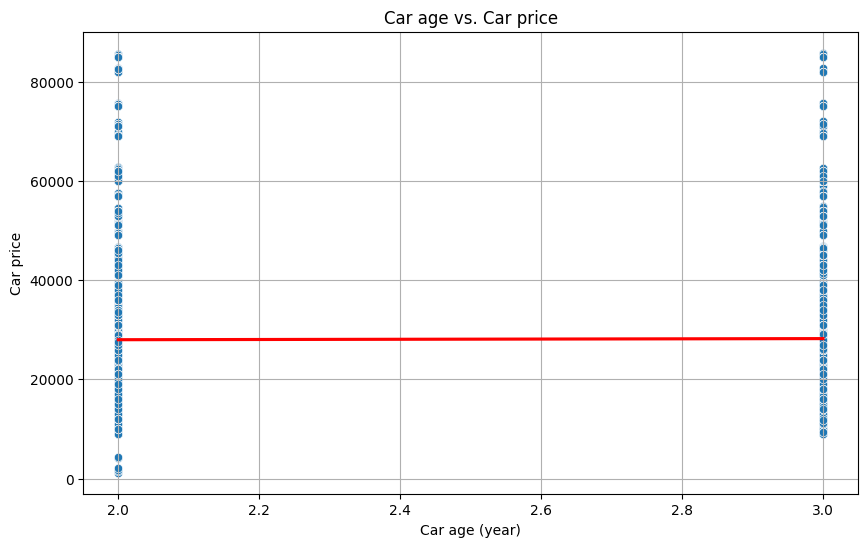

In [79]:
#Chart car age vs price

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['car_age'], y=df['Price ($)'])
sns.regplot(x=df['car_age'], y=df['Price ($)'], scatter=False, color='red')
plt.xlabel("Car age (year)")
plt.ylabel("Car price")
plt.title("Car age vs. Car price")
plt.grid(True)

plt.show()

In [80]:
#Create new column - price based on income
df['Price_to_Income'] = df['Price ($)'] / df['Annual Income']

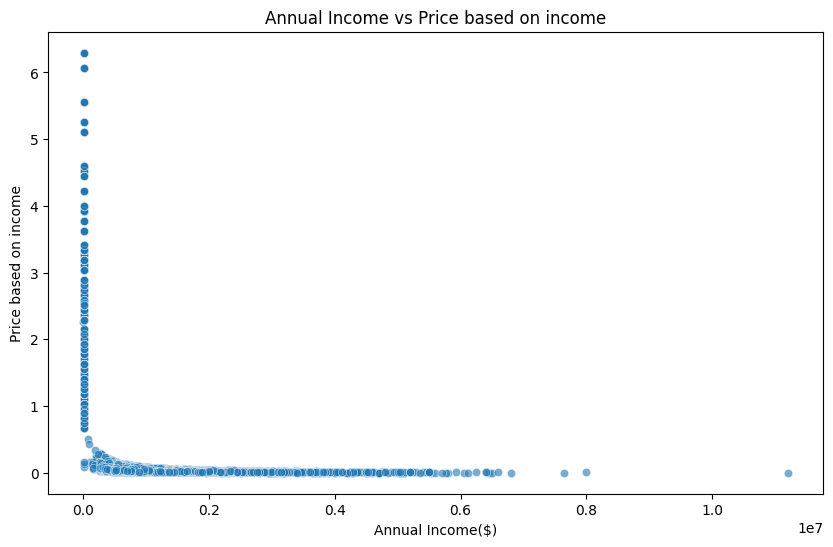

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price_to_Income', data=df, alpha=0.6)

plt.title('Annual Income vs Price based on income')
plt.xlabel('Annual Income($)')
plt.ylabel('Price based on income')
plt.show()


In [82]:
#Car type relative to income

bins = [0, 100000, 500000, df['Annual Income'].max()]
labels = ['Low Income', 'Middle Income', 'High Income']
df['Income_Category'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, include_lowest=True)
income_car_analysis = df.groupby(['Income_Category', 'Company', 'Model'])['Price ($)'].mean().reset_index()
income_car_analysis = income_car_analysis.sort_values(by='Price ($)', ascending=False)
income_car_analysis.head(10)


<ipython-input-82-117a9ac5cb39>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_car_analysis = df.groupby(['Income_Category', 'Company', 'Model'])['Price ($)'].mean().reset_index()


,Income_Category,Company,Model,Price ($)
5270,Middle Income,Cadillac,Catera,75050.428571
650,Low Income,Cadillac,Catera,57375.437500
9890,High Income,Cadillac,Catera,54805.432836
5286,Middle Income,Cadillac,DeVille,53333.833333
8920,Middle Income,Toyota,Tacoma,49375.125000
8728,Middle Income,Subaru,Outback,47800.300000
8595,Middle Income,Saturn,SC,46481.153846
5895,Middle Income,Ford,Contour,46363.727273
1275,Low Income,Ford,Contour,46074.407407
4300,Low Income,Toyota,Tacoma,46052.894737


<ipython-input-83-793d6299ef70>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Price ($)', y='Company', hue='Income_Category', data=income_car_analysis, ci=None)


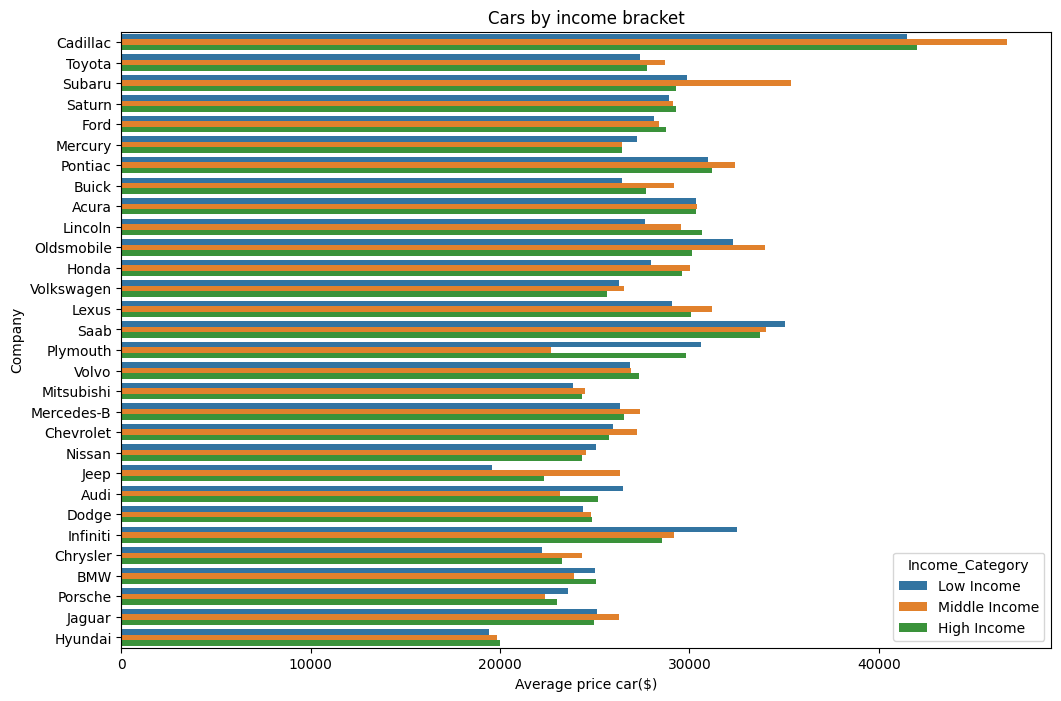

In [83]:
#Create chart car company relative to income
plt.figure(figsize=(12, 8))
sns.barplot(x='Price ($)', y='Company', hue='Income_Category', data=income_car_analysis, ci=None)
plt.title('Cars by income bracket')
plt.xlabel('Average price car($)')
plt.ylabel('Company')

plt.show()


In [84]:
#Analyse from concrete company - toyota

toyota_df = df[df['Company'] == 'Toyota']
toyota_df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Year,car_age,Price_to_Income,Income_Category
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,2022,3,1.037037,Low Income
6,C_CND_000007,2022-01-02,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14000,78758-7841,Passenger,7727879,Austin,2022,3,0.008750,High Income
18,C_CND_000019,2022-01-02,Aaliyah,Male,685000,Chrysler Plymouth,Toyota,Land Cruiser,DoubleÂ Overhead Camshaft,Auto,Pale White,33000,53546-9427,SUV,7627010,Janesville,2022,3,0.048175,High Income
20,C_CND_000021,2022-01-02,Adrianna,Male,13500,Clay Johnson Auto Sales,Toyota,4Runner,Overhead Camshaft,Manual,Black,25000,78758-7841,Sedan,7889827,Austin,2022,3,1.851852,Low Income
60,C_CND_000061,2022-01-04,Amare,Male,1330000,Ryder Truck Rental and Leasing,Toyota,Tacoma,Overhead Camshaft,Manual,Black,36000,06457-3834,Hardtop,6139882,Janesville,2022,3,0.027068,High Income


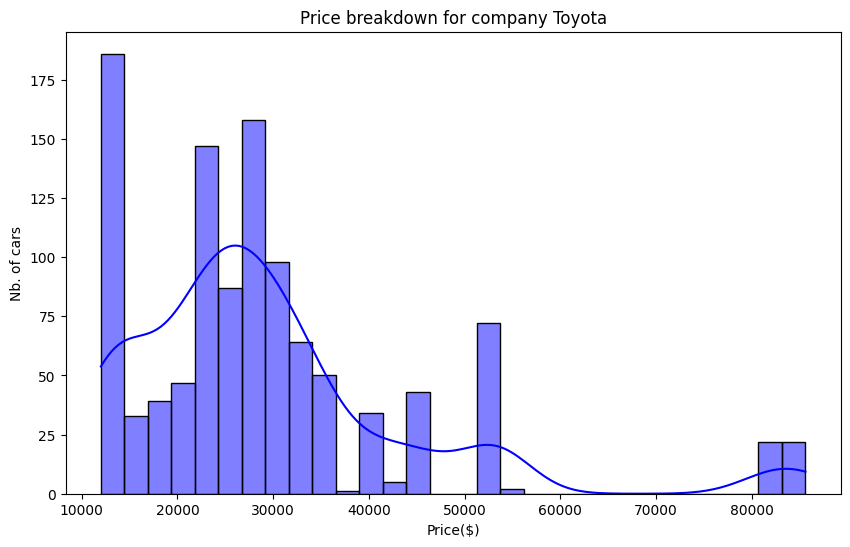

In [85]:
# Price breakdown for toyota

plt.figure(figsize=(10, 6))
sns.histplot(toyota_df['Price ($)'], kde=True, color='blue', bins=30)
plt.title('Price breakdown for company Toyota')
plt.xlabel('Price($)')
plt.ylabel('Nb. of cars')
plt.show()

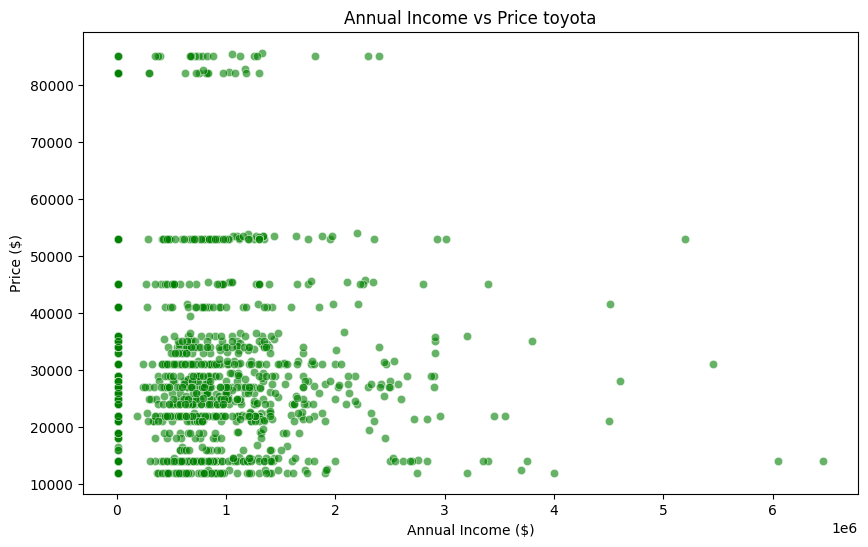

In [86]:
#Relationship between income and price of Toyota
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=toyota_df, alpha=0.6, color='green')
plt.title('Annual Income vs Price toyota')
plt.xlabel('Annual Income ($)')
plt.ylabel('Price ($)')
plt.show()


<ipython-input-87-c3f5028ba1fd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toyota_model_price.index, y=toyota_model_price.values, palette='Blues_d')


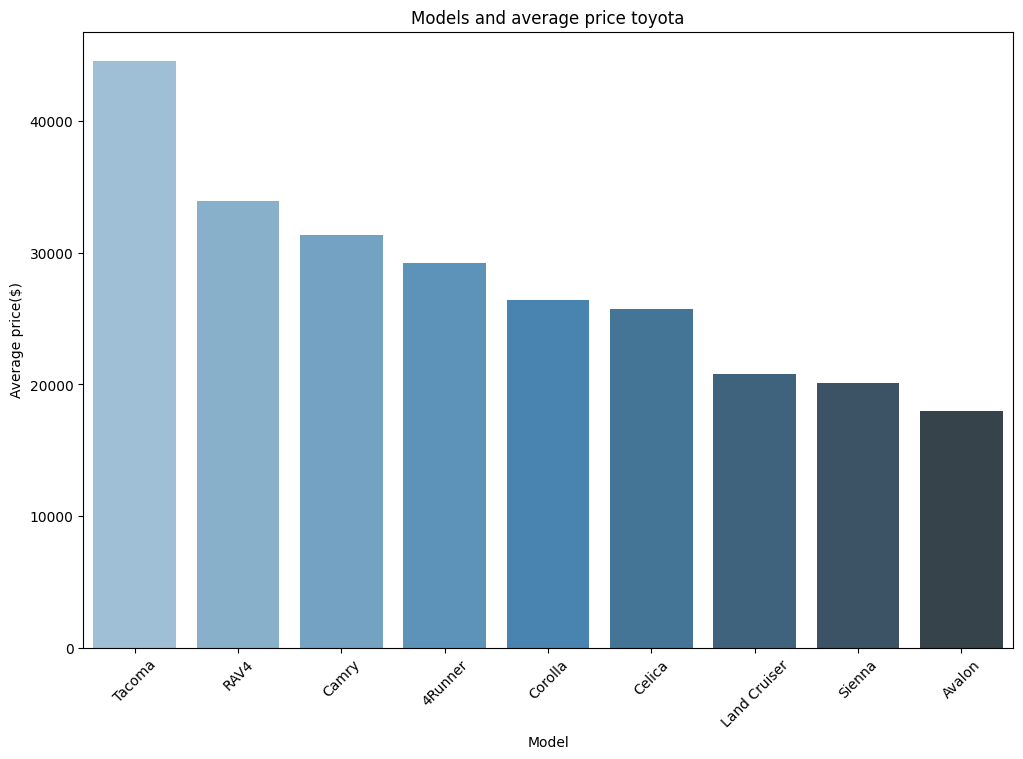

In [87]:
#Analysis of models in relation to price
toyota_model_price = toyota_df.groupby('Model')['Price ($)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=toyota_model_price.index, y=toyota_model_price.values, palette='Blues_d')
plt.title('Models and average price toyota')
plt.xlabel('Model')
plt.ylabel('Average price($)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-88-8ef4ee1f106f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toyota_region_price.index, y=toyota_region_price.values, palette='viridis')


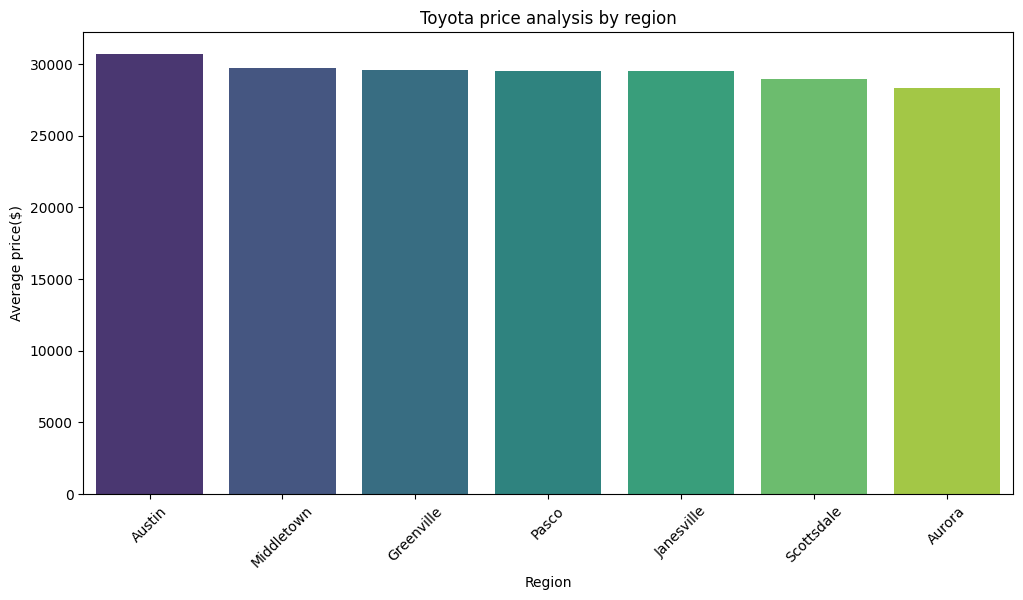

In [88]:
# Toyota price analysis by region
toyota_region_price = toyota_df.groupby('Dealer_Region')['Price ($)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=toyota_region_price.index, y=toyota_region_price.values, palette='viridis')

plt.title('Toyota price analysis by region')
plt.xlabel('Region')
plt.ylabel('Average price($)')

plt.xticks(rotation=45)
plt.show()
